# Overview

### This notebook contains the exploratory analysis into the kaggle 2017 survey data. The exploration produced a number of graphics and insights used in the report and presentation completed by Group 6. 

In [ ]:
# import basic toolboxes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set(style='whitegrid',font_scale=1.5)

from collections import Counter

In [16]:
# read in the multiple choice answers
df_multiguess = pd.read_csv('multipleChoiceResponses.csv',encoding = "latin1", low_memory=False,thousands=',')

# Generate a subset of the samples who were reporting from the US
# want only the the people responding from the US. Conveneintely the US was the largest sample 
df_mc_us = df_multiguess[df_multiguess['Country'] == 'United States']

# clean up the compensation amounts
df_mc_us_wdollars = df_mc_us[~df_mc_us['CompensationAmount'].isnull()]
df_mc_us_wdollars['CompensationAmount'] = df_mc_us_wdollars.loc[:,'CompensationAmount'].str.replace(",","").astype(float)

/Users/chuck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Salary by Job Title

In [97]:
# There are few outlier data points that seeme very extreme. Keep only values under 600 000

df_mc_us_wdollars = df_mc_us_wdollars.query('CompensationAmount<=600000')

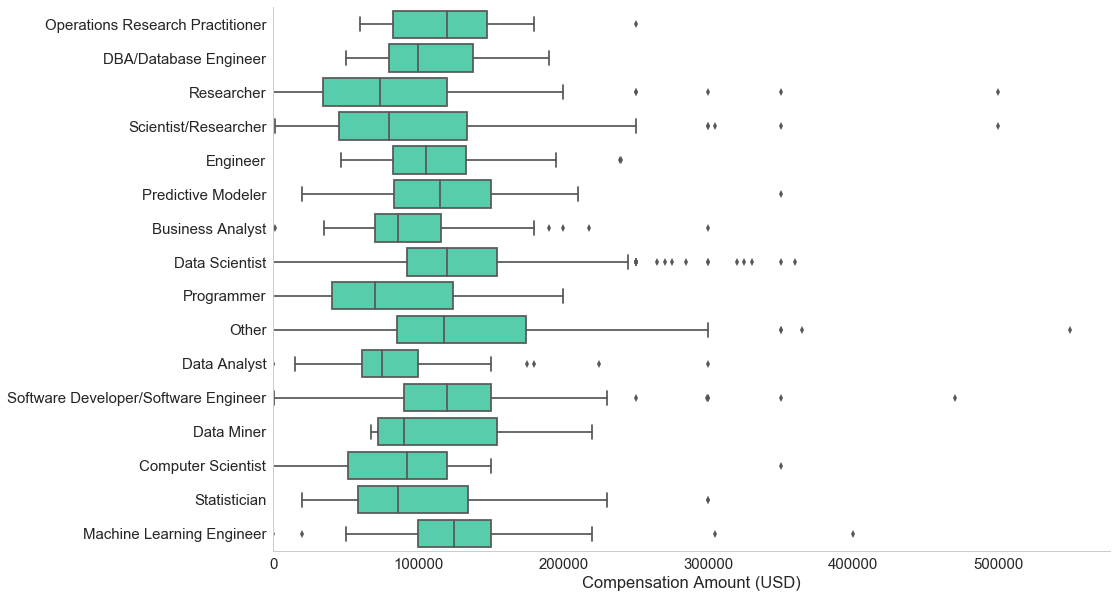

In [98]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
plot = sns.boxplot(y="CurrentJobTitleSelect", x="CompensationAmount",
                      data=df_mc_us_wdollars, color=color,ax=ax)
sns.despine(right=True)
ax.set_xlabel('Compensation Amount (USD)')
ax.set_ylabel('');
ax.set_xlim(0,)
ax.grid(False)
plt.savefig('./figures/CompensationAmounts_box.jpg',bbox_inches='tight')

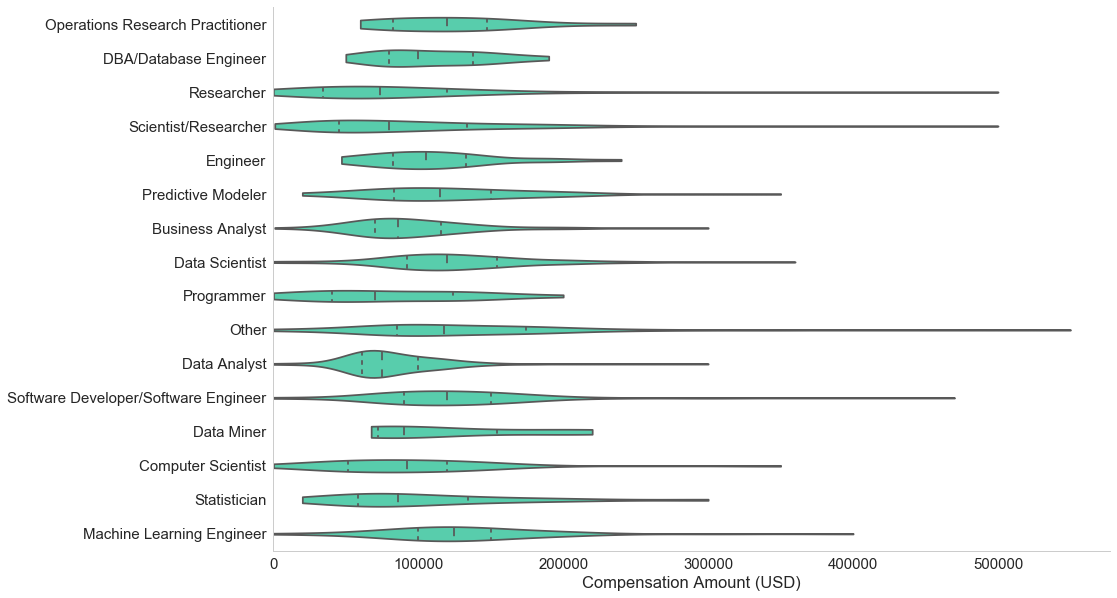

In [99]:
# plot salary by job title
fig,ax =plt.subplots(1,1,figsize=(15,10))
plot = sns.violinplot(y="CurrentJobTitleSelect", x="CompensationAmount",
                      data=df_mc_us_wdollars, color=color,ax=ax,cut=0,inner="quartile")
sns.despine(right=True)
ax.set_xlabel('Compensation Amount (USD)')
ax.set_ylabel('');
ax.set_xlim(0,)
ax.grid(False)
#plt.savefig('./figures/CompensationAmounts.jpg',bbox_inches='tight')

#### Comments:
Even with the removal of the two extreme values, the compensation amounts have high extremse. In general invidiuals are making some very good money.

### Job Satisfaction by title

In [19]:
def Map_Satisfaction(val):
    """ Need to clean up some of the values reported using this mapping function"""
    if val in ['2','3','4','5','6','7','8','9']:
        return int(val)
    elif val == 'I prefer not to share':
        return np.nan
    elif val == '1 - Highly Dissatisfied':
        return 1
    elif val == '10 - Highly Satisfied':
        return 10
    
df_multiguess['JobSatisfaction_clean'] = df_multiguess['JobSatisfaction'].apply(Map_Satisfaction)

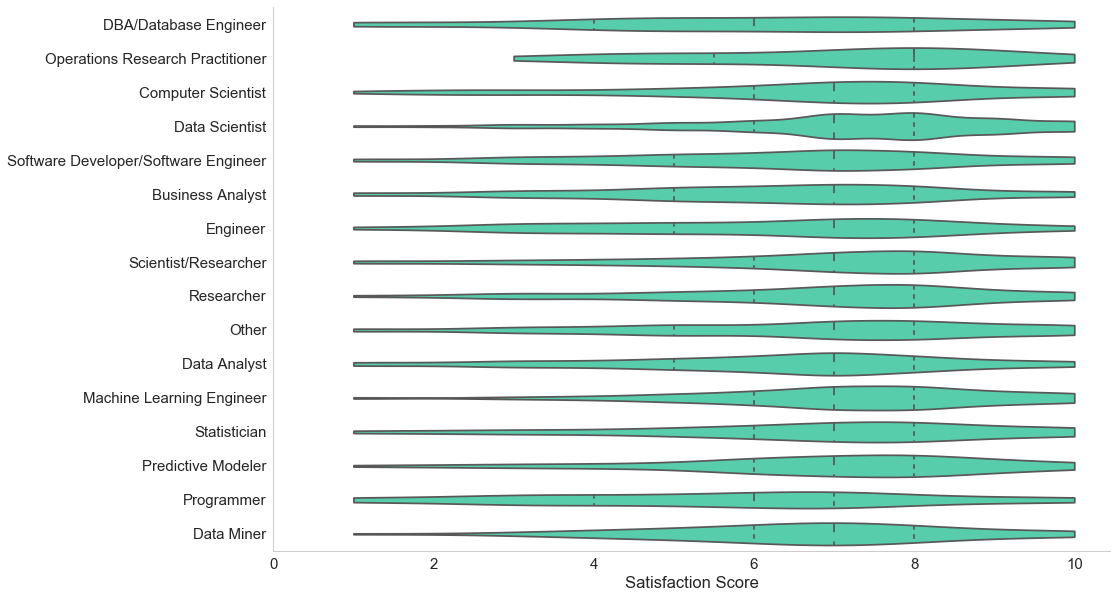

In [87]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
plot = sns.violinplot(y="CurrentJobTitleSelect", x="JobSatisfaction_clean",
                      data=df_multiguess, color=color,ax=ax,cut=0,inner="quartile")
sns.despine(right=True)
ax.set_xlabel('Satisfaction Score')
ax.set_ylabel('');
ax.set_xlim(0,)
ax.grid(False)
plt.savefig('./figures/SatisfactionScore.jpg',bbox_inches='tight')

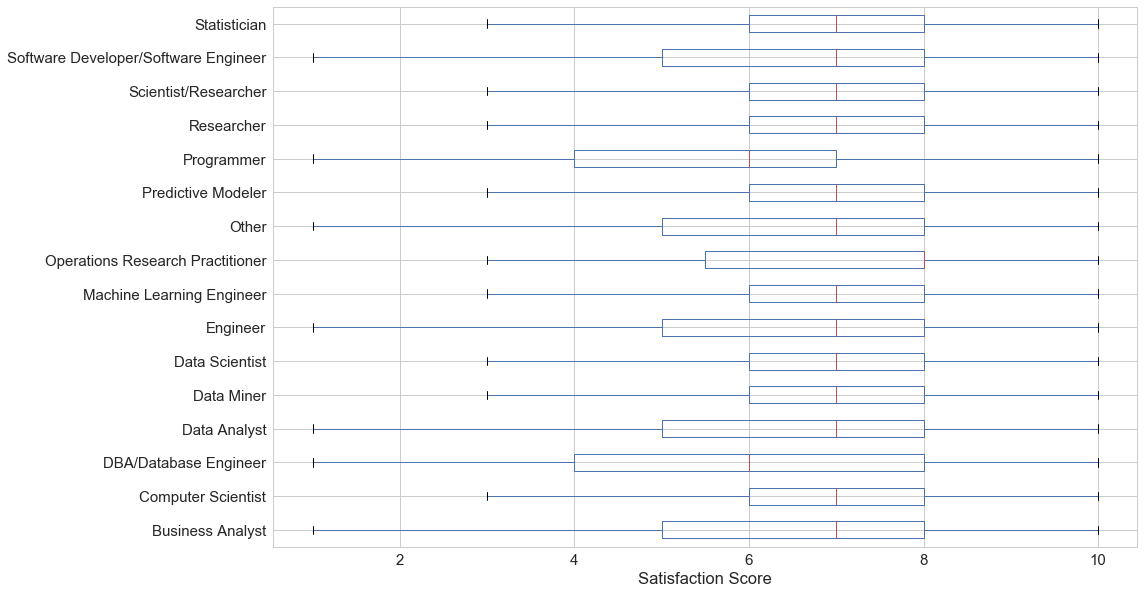

In [20]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
plot = df_multiguess.loc[:,['CurrentJobTitleSelect','JobSatisfaction_clean']].boxplot(by='CurrentJobTitleSelect'
                                                                                      ,ax=ax,showfliers=True,
                                                                                     vert=False)
plt.title('')
fig.suptitle('')
ax.set_xlabel('Satisfaction Score');

#### Comments:
The majority of professions are showing high satisfaction scores. Programmers and Database Engineers are very distinctly lower than the others.

### Pull the Free Form data in 

In [21]:
# for standardized plotting
color = '#45e0b4'
color_secondary = '#e24248'

In [22]:
# Load in the free form data
df_free = pd.read_csv('freeformResponses.csv')
df_free = df_free.dropna(axis=0,how='all')

/Users/chuck/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### How long have people been learning

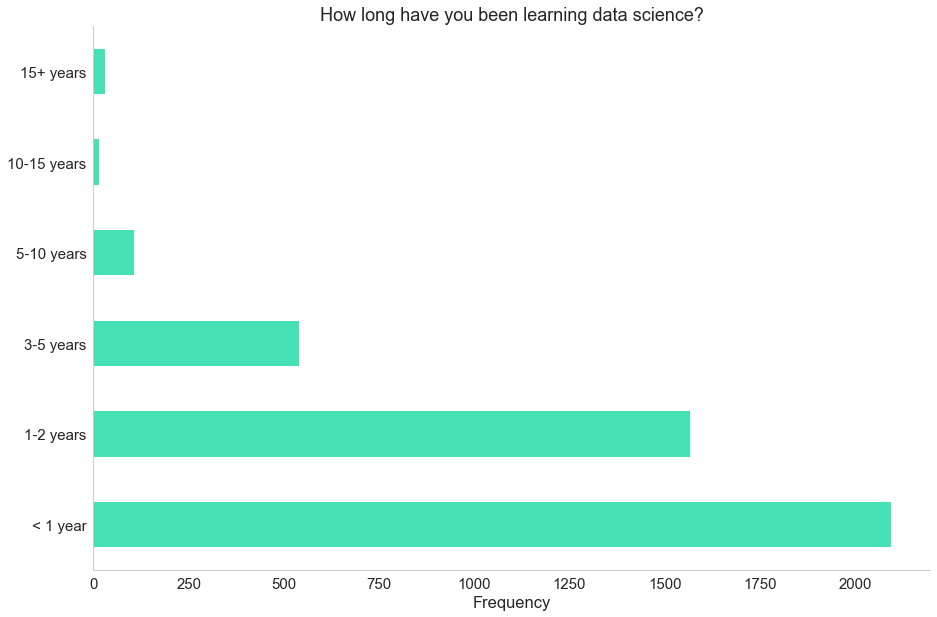

In [100]:
index_order = ['< 1 year','1-2 years','3-5 years', '5-10 years', '10-15 years', '15+ years']
df_multiguess['count'] = 1
df_toplot = df_multiguess[['LearningDataScienceTime','count']].groupby(['LearningDataScienceTime']).count().loc[index_order]

# Time for data science (what was the actual question?)

fig,ax = plt.subplots(1,1,figsize=(15,10))
df_toplot.plot(kind='barh',ax=ax,legend=False,color=color);
sns.despine(right=True)
ax.set_xlabel('Frequency')
ax.set_title('How long have you been learning data science?')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/How long have you been learning data science.jpg',bbox_inches='tight')

#### Comments:
The majority of people are still quite new to data science. This could speak to some self selction. As in new, youngers data science individuals could be the ones on kaggle.

### Formal Education

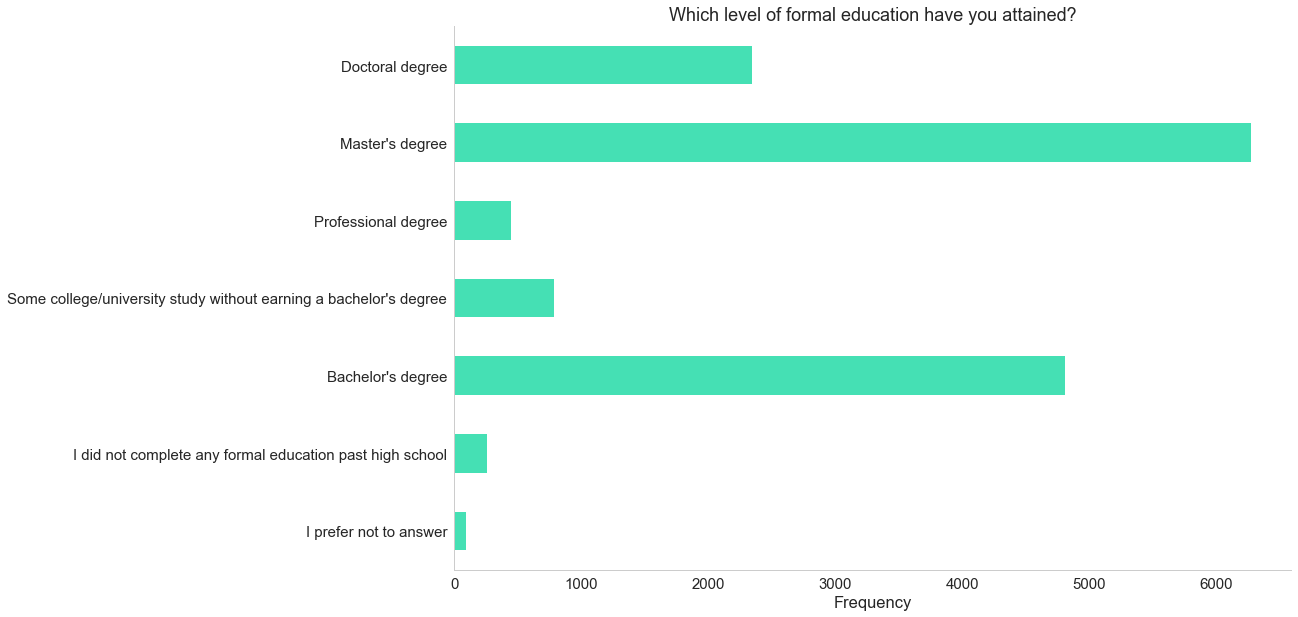

In [89]:
index_order = ["I prefer not to answer","I did not complete any formal education past high school",
 "Bachelor's degree", "Some college/university study without earning a bachelor's degree",
 "Professional degree","Master's degree","Doctoral degree"]

df_toplot = df_multiguess[['FormalEducation','count']].groupby(['FormalEducation']).count().loc[index_order]


fig,ax = plt.subplots(1,1,figsize=(15,10))
df_toplot.plot(kind='barh',ax=ax,legend=False,color=color);
sns.despine(right=True)
ax.set_xlabel('Frequency')
ax.set_title('Which level of formal education have you attained?')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/Which level of formal education have you attained.jpg',bbox_inches='tight')

#### Comments:
The majority of people have  Master's degree, but in general almost everyone has some sort of advanced degree.

### Mathmatic Prowess

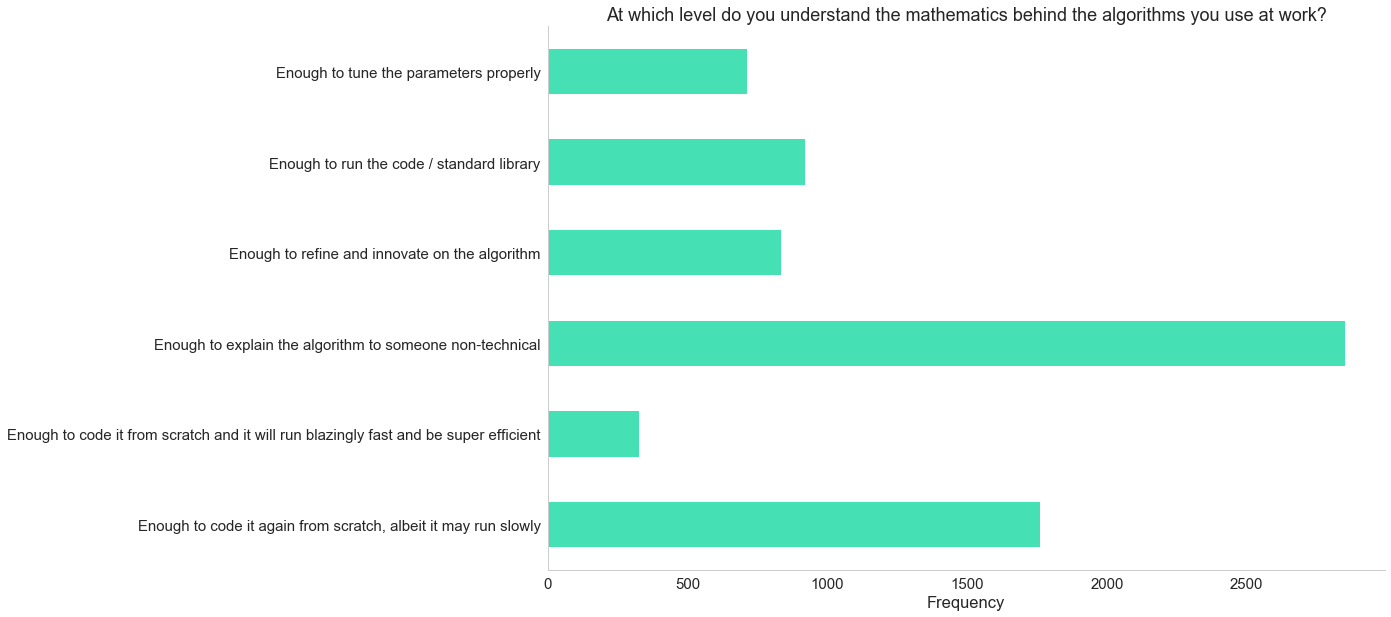

In [61]:
index_order = ['Enough to code it again from scratch, albeit it may run slowly',
       'Enough to code it from scratch and it will run blazingly fast and be super efficient',
       'Enough to explain the algorithm to someone non-technical',
       'Enough to refine and innovate on the algorithm',
       'Enough to run the code / standard library',
       'Enough to tune the parameters properly']

df_toplot = df_multiguess[['AlgorithmUnderstandingLevel','count']].groupby(['AlgorithmUnderstandingLevel']).count().loc[index_order]


fig,ax = plt.subplots(1,1,figsize=(15,10))
df_toplot.plot(kind='barh',ax=ax,legend=False,color=color);
sns.despine(right=True)
ax.set_xlabel('Frequency')
ax.set_title('At which level do you understand the mathematics behind the algorithms you use at work?')
ax.set_ylabel('');
ax.grid(False)


plt.savefig('./figures/At which level do you understand the mathematics behind the algorithms you use at work.jpg',bbox_inches='tight')

#### Comments: 
In general it appears people have a basic understanding and could functionally reproduce it. This appears that people are exposed to the fundamentals and not just the toolboxes.

### Job Satisfaction

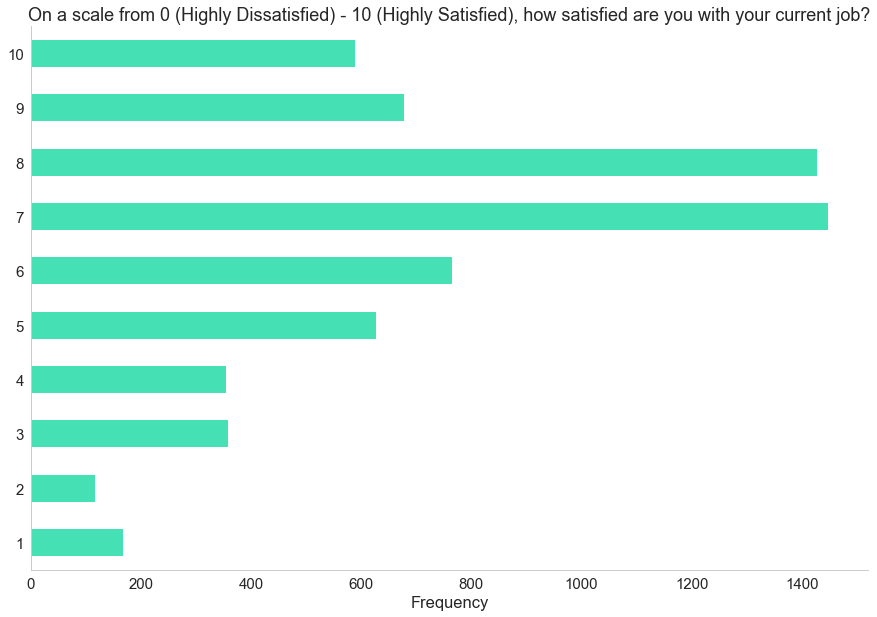

In [85]:
index_order = np.arange(1,11)

df_toplot = df_multiguess[['JobSatisfaction_clean','count']].groupby(['JobSatisfaction_clean']).count().loc[index_order]


fig,ax = plt.subplots(1,1,figsize=(15,10))
df_toplot.plot(kind='barh',ax=ax,legend=False,color=color);
sns.despine(right=True)
ax.set_xlabel('Frequency')
ax.set_title('On a scale from 0 (Highly Dissatisfied) - 10 (Highly Satisfied), how satisfied are you with your current job?')
ax.set_ylabel('');
ax.grid(False)


plt.savefig('./figures/how satisfied are you with your current job?.jpg',bbox_inches='tight')

#### Comments:
On the whole, people seem very satisfied.

### What are industry workers saying people need to have?

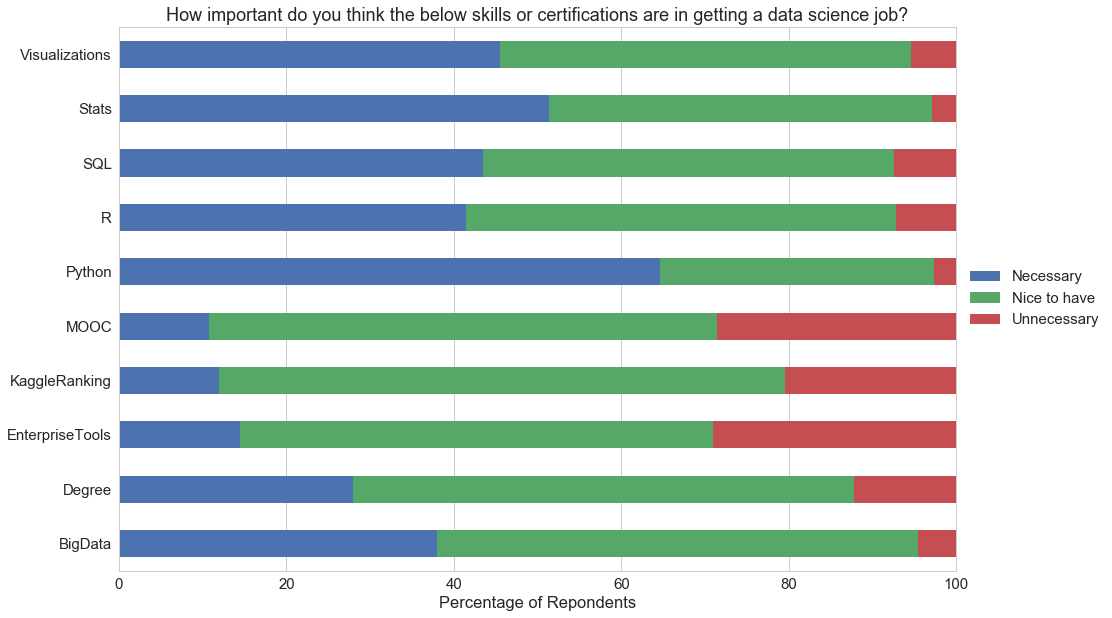

In [70]:
temp = df_multiguess[[
'JobSkillImportanceBigData',
'JobSkillImportanceDegree',
'JobSkillImportanceStats',
'JobSkillImportanceEnterpriseTools',
'JobSkillImportancePython',
'JobSkillImportanceR',
'JobSkillImportanceSQL',
'JobSkillImportanceKaggleRanking',
'JobSkillImportanceMOOC',
'JobSkillImportanceVisualizations']].dropna(axis=0,how='all')

temp.rename(columns = {x:x.split('Importance')[1] for x in temp.columns.tolist()},inplace=True)
fig,ax = plt.subplots(1,1,figsize=(15,10))
temp = temp.melt()
#temp['ones'] = 1
temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp2.apply(lambda x: 100 * x / temp2.sum(axis=1)).plot(kind='barh',stacked=True,ax=ax)
ax.set_title('How important do you think the below skills or certifications are in getting a data science job?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents')
ax.set_ylabel('');

No handles with labels found to put in legend.


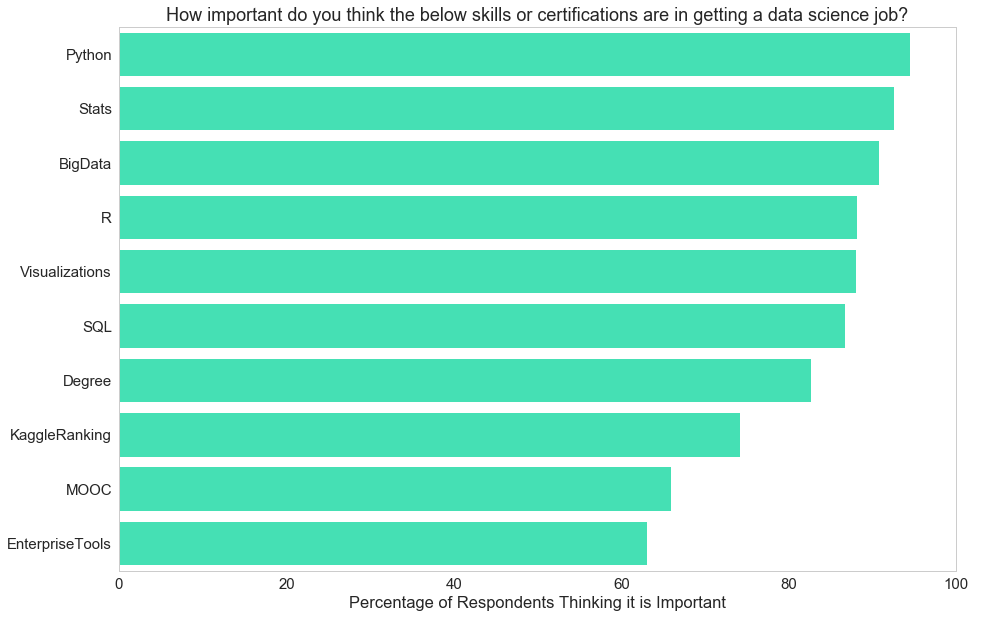

In [88]:
# The above is hard to read, so map the responses to a binary set of need to have or not.

temp = df_multiguess[[
'JobSkillImportanceBigData',
'JobSkillImportanceDegree',
'JobSkillImportanceStats',
'JobSkillImportanceEnterpriseTools',
'JobSkillImportancePython',
'JobSkillImportanceR',
'JobSkillImportanceSQL',
'JobSkillImportanceKaggleRanking',
'JobSkillImportanceMOOC',
'JobSkillImportanceVisualizations']].dropna(axis=0,how='all')



def Map_to_values(val):
    if val == 'Necessary':
        return 1
    elif val == 'Nice to have':
        return 1
    elif val == 'Unnecessary':
        return 0
    else:
        return 0

numerator = temp.shape[0]
temp = temp.loc[:,:].applymap(Map_to_values)

temp.rename(columns = {x:x.split('Importance')[1] for x in temp.columns.tolist()},inplace=True)
temp = temp.sum(axis=0)
fig,ax = plt.subplots(1,1,figsize=(15,10))

temp = temp.apply(lambda x: 100 * x / numerator).sort_values(ascending=True).tail(20)
temp = temp.to_frame().reset_index()#.plot(kind='barh',stacked=True,ax=ax,color='blue')

plot = sns.barplot(y='index',x = 0, data=temp.sort_values(by=0,ascending=False),ax=ax,color=color, saturation=1)
ax.set_title('How important do you think the below skills or certifications are in getting a data science job?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Respondents Thinking it is Important')
ax.set_ylabel('');
ax.grid(False)


#plt.savefig('./figures/How important do you think the below skills or certifications are in getting a data science job.jpg',bbox_inches='tight')

#### Comments:
The industry is saying that a program is the most important followed by some skills in stats or data science. 

### What is being used by industry?

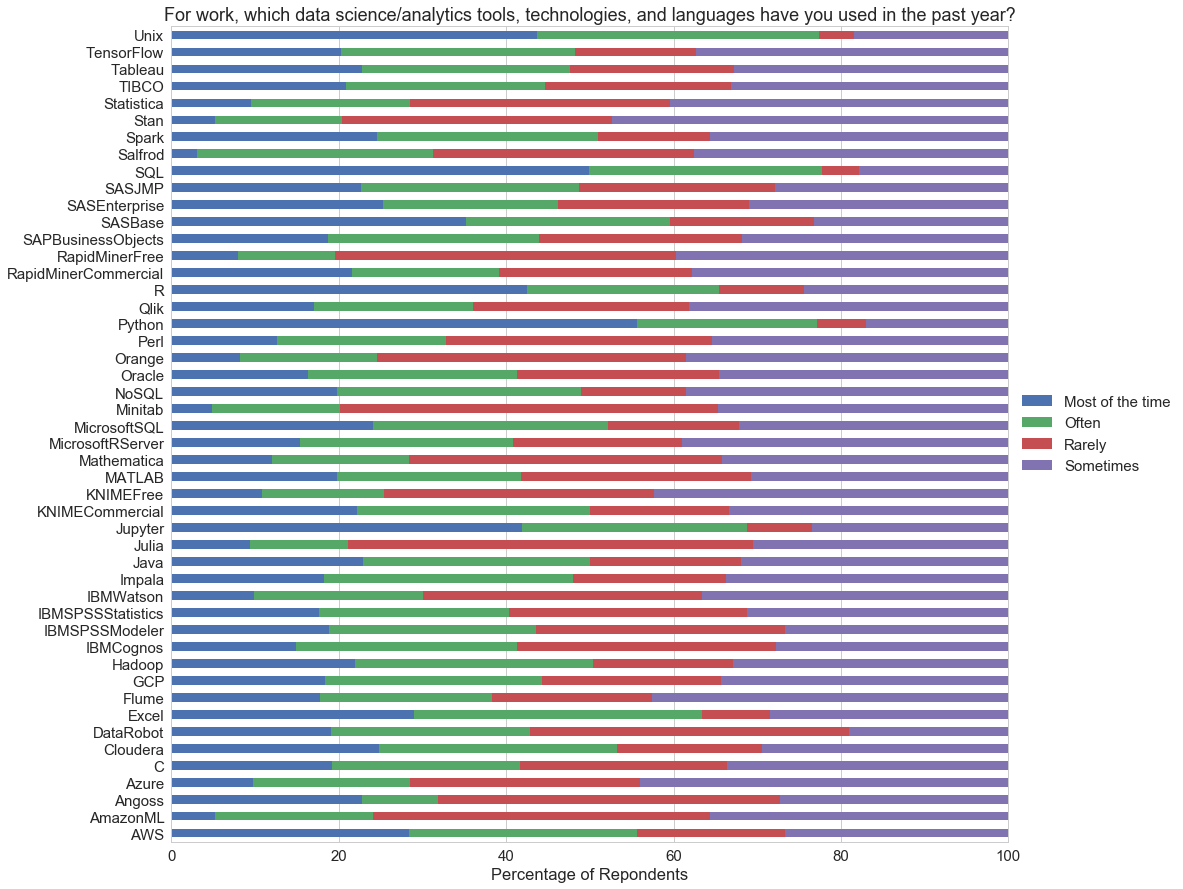

In [71]:
temp = df_multiguess[['WorkToolsFrequencyAmazonML',
'WorkToolsFrequencyAWS',
'WorkToolsFrequencyAngoss',
'WorkToolsFrequencyC',
'WorkToolsFrequencyCloudera',
'WorkToolsFrequencyDataRobot',
'WorkToolsFrequencyFlume',
'WorkToolsFrequencyGCP',
'WorkToolsFrequencyHadoop',
'WorkToolsFrequencyIBMCognos',
'WorkToolsFrequencyIBMSPSSModeler',
'WorkToolsFrequencyIBMSPSSStatistics',
'WorkToolsFrequencyIBMWatson',
'WorkToolsFrequencyImpala',
'WorkToolsFrequencyJava',
'WorkToolsFrequencyJulia',
'WorkToolsFrequencyJupyter',
'WorkToolsFrequencyKNIMECommercial',
'WorkToolsFrequencyKNIMEFree',
'WorkToolsFrequencyMathematica',
'WorkToolsFrequencyMATLAB',
'WorkToolsFrequencyAzure',
'WorkToolsFrequencyExcel',
'WorkToolsFrequencyMicrosoftRServer',
'WorkToolsFrequencyMicrosoftSQL',
'WorkToolsFrequencyMinitab',
'WorkToolsFrequencyNoSQL',
'WorkToolsFrequencyOracle',
'WorkToolsFrequencyOrange',
'WorkToolsFrequencyPerl',
'WorkToolsFrequencyPython',
'WorkToolsFrequencyQlik',
'WorkToolsFrequencyR',
'WorkToolsFrequencyRapidMinerCommercial',
'WorkToolsFrequencyRapidMinerFree',
'WorkToolsFrequencySalfrod',
'WorkToolsFrequencySAPBusinessObjects',
'WorkToolsFrequencySASBase',
'WorkToolsFrequencySASEnterprise',
'WorkToolsFrequencySASJMP',
'WorkToolsFrequencySpark',
'WorkToolsFrequencySQL',
'WorkToolsFrequencyStan',
'WorkToolsFrequencyStatistica',
'WorkToolsFrequencyTableau',
'WorkToolsFrequencyTensorFlow',
'WorkToolsFrequencyTIBCO',
'WorkToolsFrequencyUnix']].dropna(axis=0,how='all')
temp.rename(columns = {x:x.split('Frequency')[1] for x in temp.columns.tolist()},inplace=True)


fig,ax = plt.subplots(1,1,figsize=(15,15))
temp = temp.melt()
temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp2.apply(lambda x: 100 * x / temp2.sum(axis=1)).plot(kind='barh',stacked=True,ax=ax)

ax.set_title('For work, which data science/analytics tools, technologies, and languages have you used in the past year?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents')
ax.set_ylabel('');

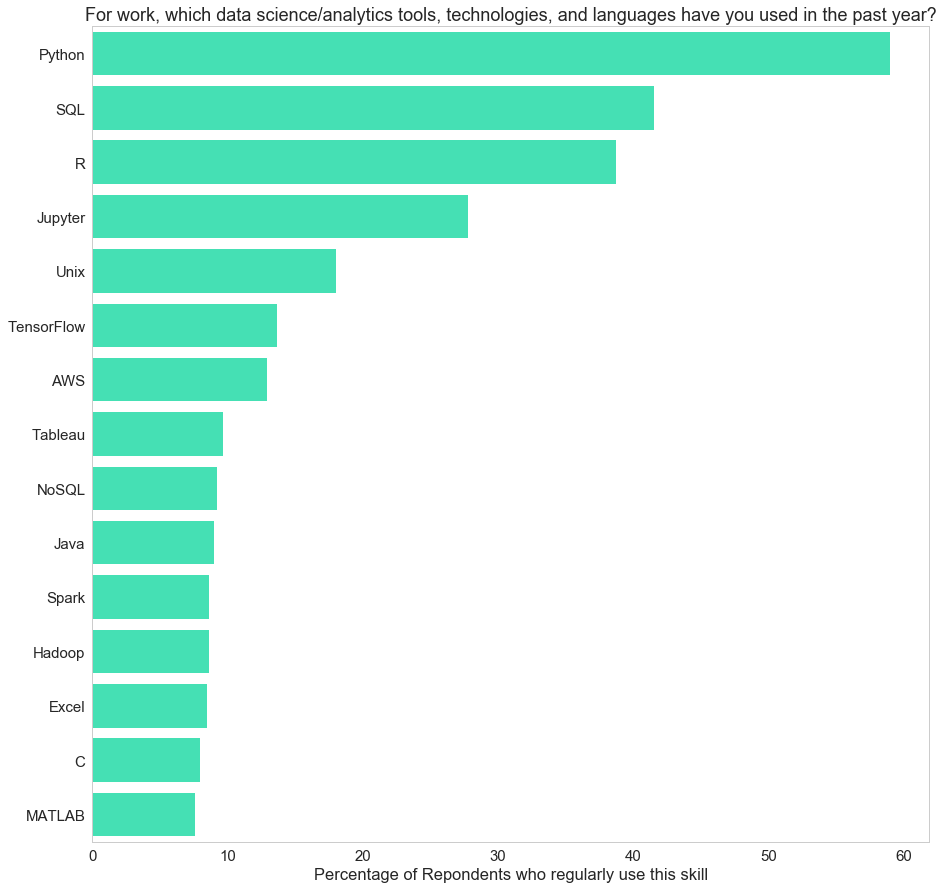

In [64]:
# Again the above graph is difficult to read, as such a binary mapping is applied to if it was regularly used by the worker in the last year

temp = df_multiguess[['WorkToolsFrequencyAmazonML',
'WorkToolsFrequencyAWS',
'WorkToolsFrequencyAngoss',
'WorkToolsFrequencyC',
'WorkToolsFrequencyCloudera',
'WorkToolsFrequencyDataRobot',
'WorkToolsFrequencyFlume',
'WorkToolsFrequencyGCP',
'WorkToolsFrequencyHadoop',
'WorkToolsFrequencyIBMCognos',
'WorkToolsFrequencyIBMSPSSModeler',
'WorkToolsFrequencyIBMSPSSStatistics',
'WorkToolsFrequencyIBMWatson',
'WorkToolsFrequencyImpala',
'WorkToolsFrequencyJava',
'WorkToolsFrequencyJulia',
'WorkToolsFrequencyJupyter',
'WorkToolsFrequencyKNIMECommercial',
'WorkToolsFrequencyKNIMEFree',
'WorkToolsFrequencyMathematica',
'WorkToolsFrequencyMATLAB',
'WorkToolsFrequencyAzure',
'WorkToolsFrequencyExcel',
'WorkToolsFrequencyMicrosoftRServer',
'WorkToolsFrequencyMicrosoftSQL',
'WorkToolsFrequencyMinitab',
'WorkToolsFrequencyNoSQL',
'WorkToolsFrequencyOracle',
'WorkToolsFrequencyOrange',
'WorkToolsFrequencyPerl',
'WorkToolsFrequencyPython',
'WorkToolsFrequencyQlik',
'WorkToolsFrequencyR',
'WorkToolsFrequencyRapidMinerCommercial',
'WorkToolsFrequencyRapidMinerFree',
'WorkToolsFrequencySalfrod',
'WorkToolsFrequencySAPBusinessObjects',
'WorkToolsFrequencySASBase',
'WorkToolsFrequencySASEnterprise',
'WorkToolsFrequencySASJMP',
'WorkToolsFrequencySpark',
'WorkToolsFrequencySQL',
'WorkToolsFrequencyStan',
'WorkToolsFrequencyStatistica',
'WorkToolsFrequencyTableau',
'WorkToolsFrequencyTensorFlow',
'WorkToolsFrequencyTIBCO',
'WorkToolsFrequencyUnix']].dropna(axis=0,how='all')

def Map_to_values(val):
    if val == 'Most of the time':
        return 1
    elif val == 'Often':
        return 1
    elif val == 'Rarely':
        return 0
    else:
        return 0


numerator = temp.shape[0]
temp = temp.loc[:,:].applymap(Map_to_values)

temp.rename(columns = {x:x.split('Frequency')[1] for x in temp.columns.tolist()},inplace=True)
temp = temp.sum(axis=0)

fig,ax = plt.subplots(1,1,figsize=(15,15))
#temp = temp.melt()
#temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp = temp.apply(lambda x: 100 * x / numerator).sort_values(ascending=True).tail(15)
temp = temp.to_frame().reset_index()#.plot(kind='barh',stacked=True,ax=ax,color='blue')
plot = sns.barplot(y='index',x = 0, data=temp.sort_values(by=0,ascending=False),ax=ax,color=color, saturation=1)


ax.set_title('For work, which data science/analytics tools, technologies, and languages have you used in the past year?')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents who regularly use this skill')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/have you used in the past year.jpg',bbox_inches='tight')

#### Comments:
The top skills are programming in python (and jupyter), SQL and R. These all are often cited as key for the industry. 

In [211]:
#temp.to_clipboard() # to plot manually 

### What are the most popular methods used by professionals in the industry?

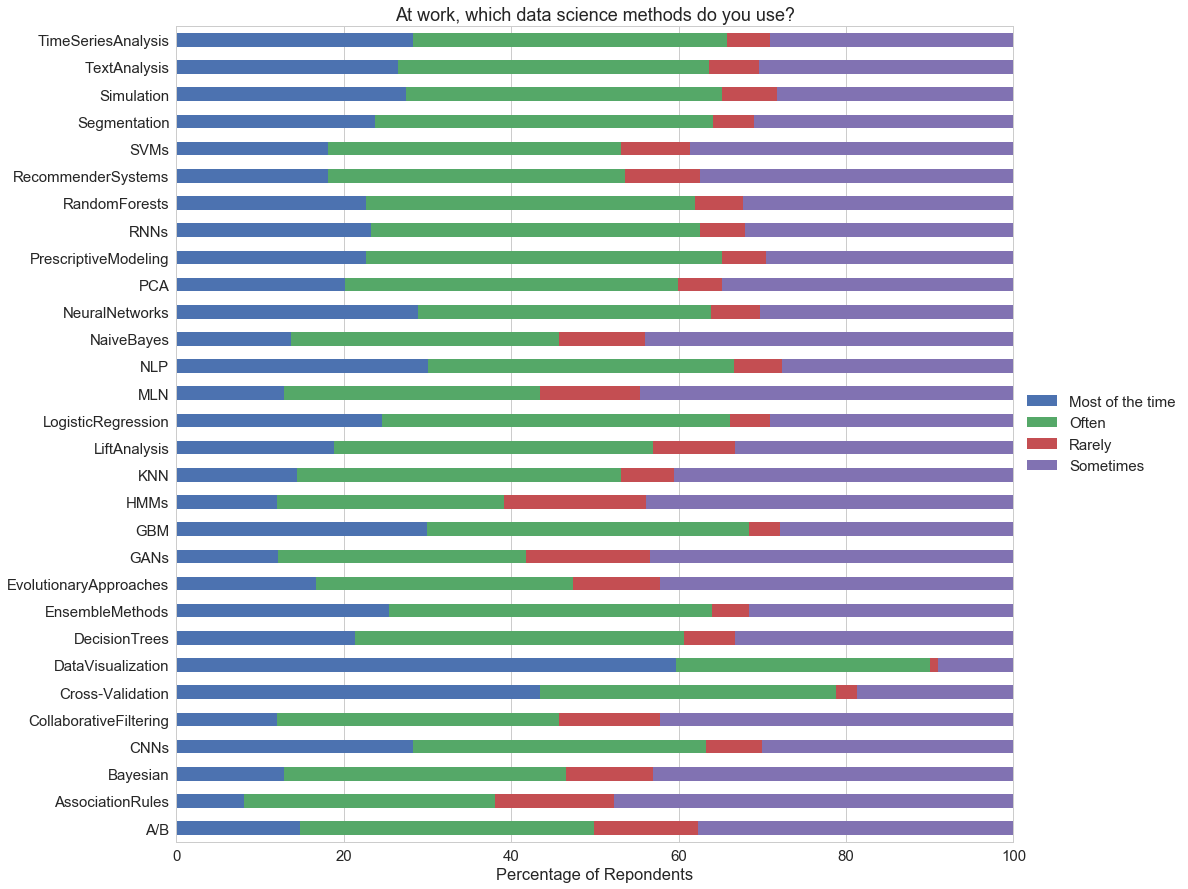

In [65]:
temp = df_multiguess[['WorkMethodsFrequencyA/B',
'WorkMethodsFrequencyAssociationRules',
'WorkMethodsFrequencyBayesian',
'WorkMethodsFrequencyCNNs',
'WorkMethodsFrequencyCollaborativeFiltering',
'WorkMethodsFrequencyCross-Validation',
'WorkMethodsFrequencyDataVisualization',
'WorkMethodsFrequencyDecisionTrees',
'WorkMethodsFrequencyEnsembleMethods',
'WorkMethodsFrequencyEvolutionaryApproaches',
'WorkMethodsFrequencyGANs',
'WorkMethodsFrequencyGBM',
'WorkMethodsFrequencyHMMs',
'WorkMethodsFrequencyKNN',
'WorkMethodsFrequencyLiftAnalysis',
'WorkMethodsFrequencyLogisticRegression',
'WorkMethodsFrequencyMLN',
'WorkMethodsFrequencyNaiveBayes',
'WorkMethodsFrequencyNLP',
'WorkMethodsFrequencyNeuralNetworks',
'WorkMethodsFrequencyPCA',
'WorkMethodsFrequencyPrescriptiveModeling',
'WorkMethodsFrequencyRandomForests',
'WorkMethodsFrequencyRecommenderSystems',
'WorkMethodsFrequencyRNNs',
'WorkMethodsFrequencySegmentation',
'WorkMethodsFrequencySimulation',
'WorkMethodsFrequencySVMs',
'WorkMethodsFrequencyTextAnalysis',
'WorkMethodsFrequencyTimeSeriesAnalysis']].dropna(axis=0,how='all')

temp.rename(columns = {x:x.split('Frequency')[1] for x in temp.columns.tolist()},inplace=True)


fig,ax = plt.subplots(1,1,figsize=(15,15))
temp = temp.melt()
temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp2.apply(lambda x: 100 * x / temp2.sum(axis=1)).plot(kind='barh',stacked=True,ax=ax)

ax.set_title('At work, which data science methods do you use?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents')
ax.set_ylabel('');

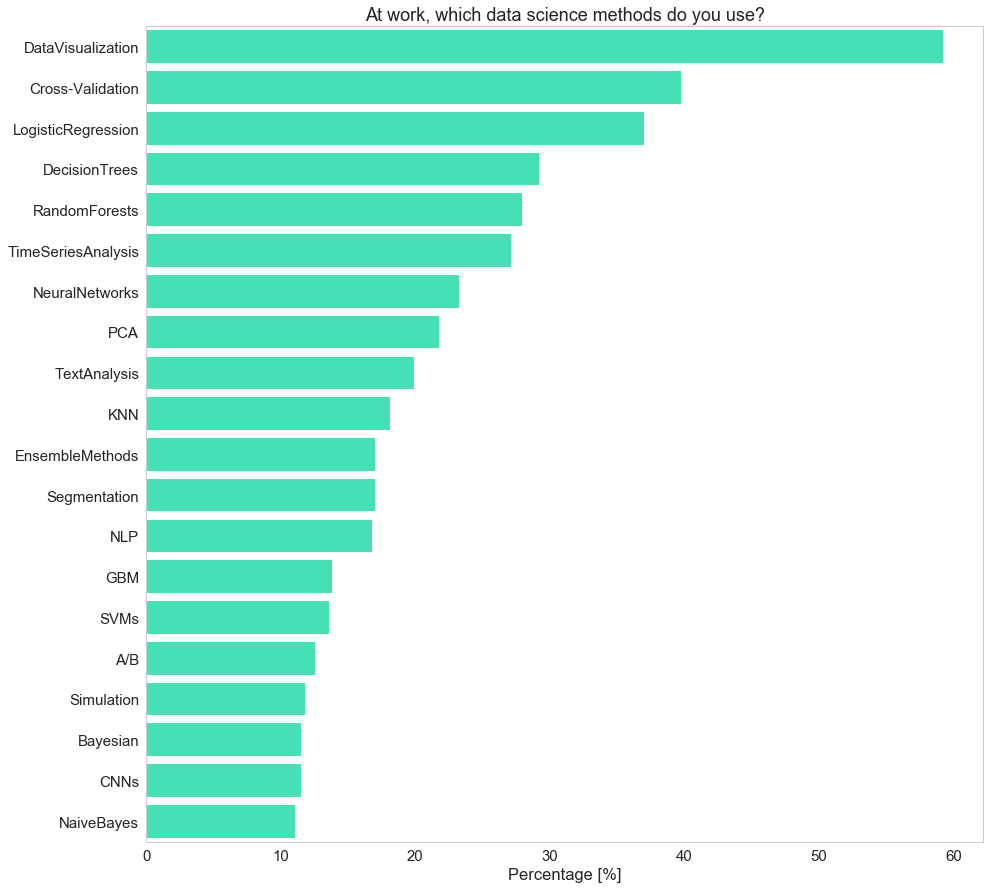

In [66]:
# remake with a binary mapping to make easier to interpret

# remake the following with the top n with total sum 
temp = df_multiguess[['WorkMethodsFrequencyA/B',
'WorkMethodsFrequencyAssociationRules',
'WorkMethodsFrequencyBayesian',
'WorkMethodsFrequencyCNNs',
'WorkMethodsFrequencyCollaborativeFiltering',
'WorkMethodsFrequencyCross-Validation',
'WorkMethodsFrequencyDataVisualization',
'WorkMethodsFrequencyDecisionTrees',
'WorkMethodsFrequencyEnsembleMethods',
'WorkMethodsFrequencyEvolutionaryApproaches',
'WorkMethodsFrequencyGANs',
'WorkMethodsFrequencyGBM',
'WorkMethodsFrequencyHMMs',
'WorkMethodsFrequencyKNN',
'WorkMethodsFrequencyLiftAnalysis',
'WorkMethodsFrequencyLogisticRegression',
'WorkMethodsFrequencyMLN',
'WorkMethodsFrequencyNaiveBayes',
'WorkMethodsFrequencyNLP',
'WorkMethodsFrequencyNeuralNetworks',
'WorkMethodsFrequencyPCA',
'WorkMethodsFrequencyPrescriptiveModeling',
'WorkMethodsFrequencyRandomForests',
'WorkMethodsFrequencyRecommenderSystems',
'WorkMethodsFrequencyRNNs',
'WorkMethodsFrequencySegmentation',
'WorkMethodsFrequencySimulation',
'WorkMethodsFrequencySVMs',
'WorkMethodsFrequencyTextAnalysis',
'WorkMethodsFrequencyTimeSeriesAnalysis']].dropna(axis=0,how='all')

def Map_to_values(val):
    if val == 'Most of the time':
        return 1
    elif val == 'Often':
        return 1
    elif val == 'Rarely':
        return 0
    else:
        return 0

numerator = temp.shape[0]
temp = temp.loc[:,:].applymap(Map_to_values)

temp.rename(columns = {x:x.split('Frequency')[1] for x in temp.columns.tolist()},inplace=True)
temp = temp.sum(axis=0)

fig,ax = plt.subplots(1,1,figsize=(15,15))
#temp = temp.melt()
#temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp = temp.apply(lambda x: 100 * x / numerator).sort_values(ascending=True).tail(20)
temp = temp.to_frame().reset_index()#.plot(kind='barh',stacked=True,ax=ax,color='blue')
plot = sns.barplot(y='index',x = 0, data=temp.sort_values(by=0,ascending=False),ax=ax,color=color, saturation=1)



ax.set_title('At work, which data science methods do you use?')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage [%]')
ax.set_ylabel('');
ax.grid(False)
#plt.savefig('./figures/which data science methods do you use.jpg',bbox_inches='tight')

#### Comments:
Data visualization is a very broad category but is seen as the top skill. More specific techniques like cross-validated and logistic regression 

In [213]:
#temp.to_clipboard() # to plot manually 

### what do people in industry feel like they are competent at

In [67]:
skill_collection = Counter()
for row in df_multiguess['MLSkillsSelect'].tolist():
    
    if type(row) != float:
        #print(row)
        skill_collection.update(row.split(','))

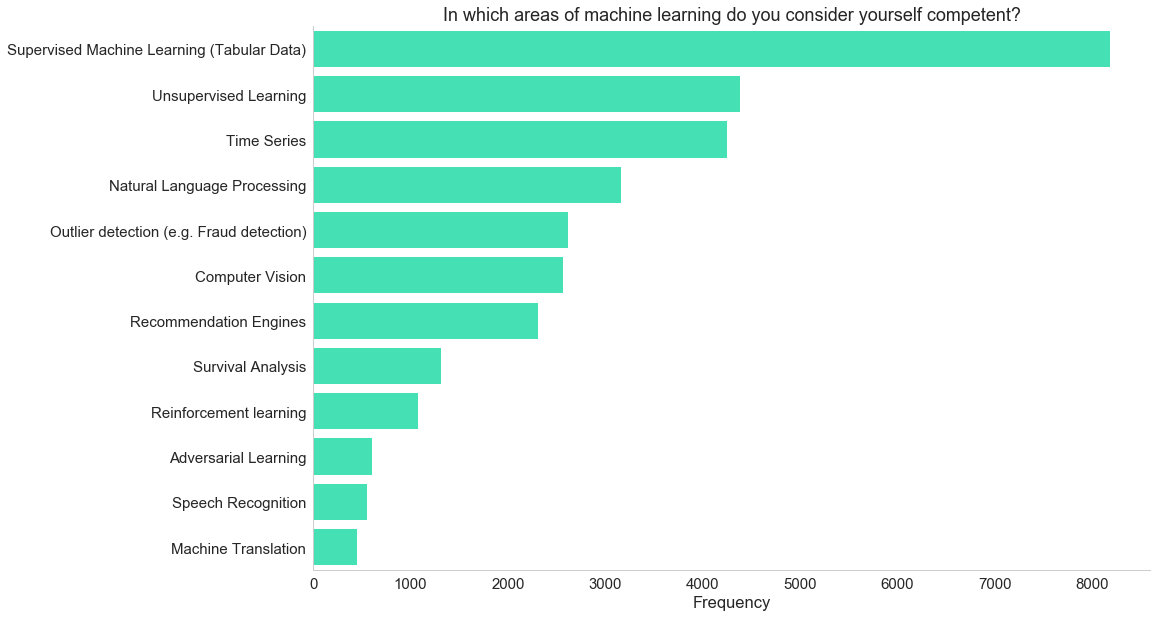

In [68]:
df = pd.DataFrame.from_dict(skill_collection, orient='index').reset_index()
df = df.drop(12) # remove the 'other category'

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index",x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)
sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('In which areas of machine learning do you consider yourself competent?')
ax.set_xlabel('Frequency')
ax.set_ylabel('')
ax.grid(False)
plt.savefig('./figures/In which areas of machine learning do you consider yourself competent.jpg',bbox_inches='tight')

### Comments:
Supervised and unsupervised learning are the top 2. Clearly a lot of focus in the past has beeen put here. These are also very broad categories.

In [208]:
## To save
#df.to_csv('MLSkills.csv',index=False)

### How do people learn

In [69]:
plat_collection = Counter()
for row in df_multiguess['LearningPlatformSelect'].tolist():
    if type(row) != float:
        #print(row)
        plat_collection.update(row.split(','))

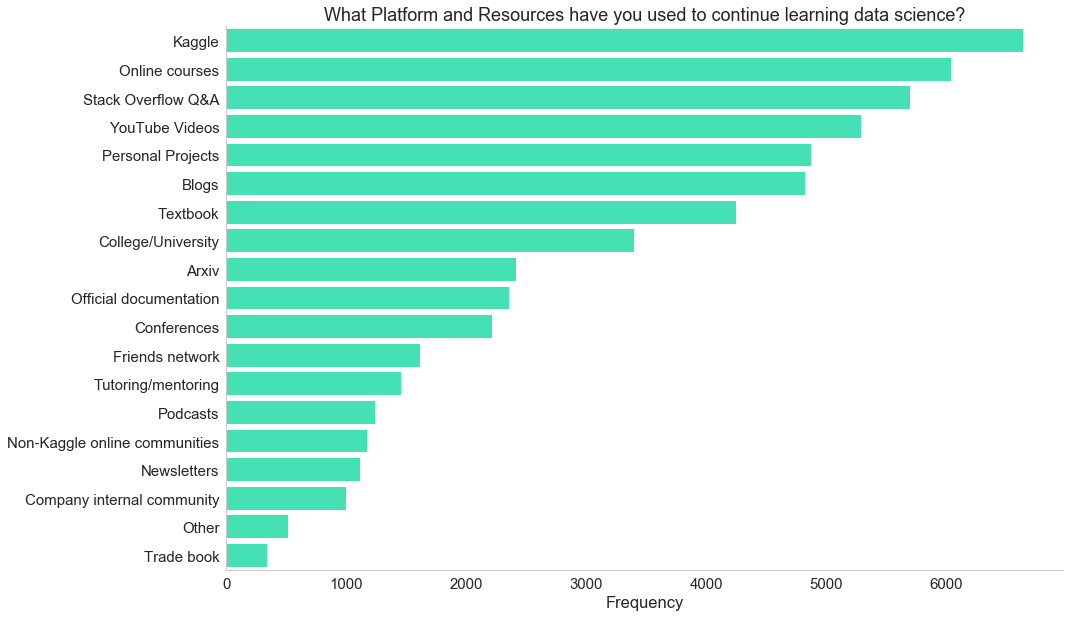

In [70]:
df = pd.DataFrame.from_dict(plat_collection, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('What Platform and Resources have you used to continue learning data science?')
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/What Platform and Resources have you used to continue learning data science.jpg',bbox_inches='tight')

### Comments:
Kaggle coming up as number 1 would seem very suspect to self-selection bias. 

### How useful are certain platforms

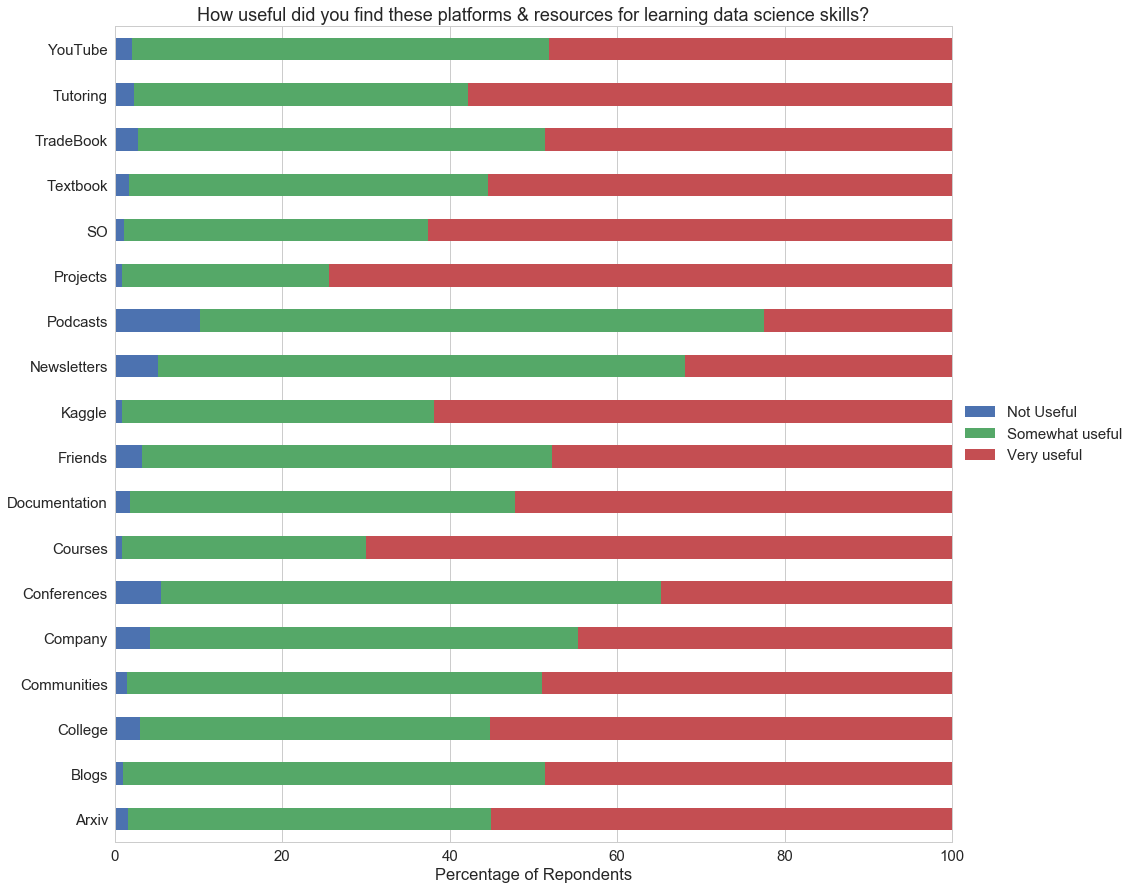

In [86]:
temp = df_multiguess[['LearningPlatformUsefulnessArxiv',
'LearningPlatformUsefulnessBlogs',
'LearningPlatformUsefulnessCollege',
'LearningPlatformUsefulnessCompany',
'LearningPlatformUsefulnessConferences',
'LearningPlatformUsefulnessFriends',
'LearningPlatformUsefulnessKaggle',
'LearningPlatformUsefulnessNewsletters',
'LearningPlatformUsefulnessCommunities',
'LearningPlatformUsefulnessDocumentation',
'LearningPlatformUsefulnessCourses',
'LearningPlatformUsefulnessProjects',
'LearningPlatformUsefulnessPodcasts',
'LearningPlatformUsefulnessSO',
'LearningPlatformUsefulnessTextbook',
'LearningPlatformUsefulnessTradeBook',
'LearningPlatformUsefulnessTutoring',
'LearningPlatformUsefulnessYouTube']].dropna(axis=0,how='all')

temp.rename(columns = {x:x.split('Usefulness')[1] for x in temp.columns.tolist()},inplace=True)


fig,ax = plt.subplots(1,1,figsize=(15,15))
temp = temp.melt()
temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
temp2.apply(lambda x: 100 * x / temp2.sum(axis=1)).plot(kind='barh',stacked=True,ax=ax)

ax.set_title('How useful did you find these platforms & resources for learning data science skills?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents')
ax.set_ylabel('');

### Comments:
Courses and projects are the top useful thigns for learning.

### Challenges faced by industry


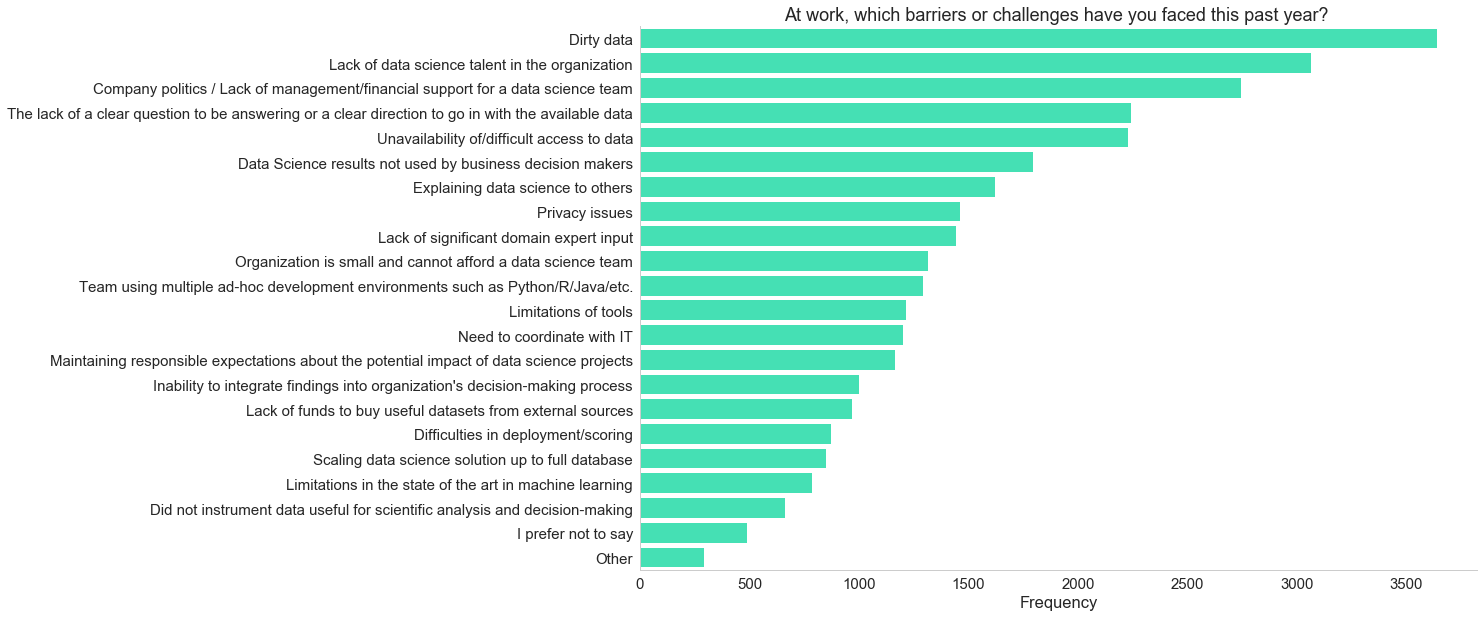

In [73]:
method_coll = Counter()
column = 'WorkChallengesSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update(row.split(','))
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('At work, which barriers or challenges have you faced this past year? ')
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/which barriers or challenges have you faced this past year.jpg',bbox_inches='tight')

### Comments:
Data cleaning appears the most prominant issue and a lack of talent. Both of these should be prepared for by new people in the industry.

### Competent Skills for everyone

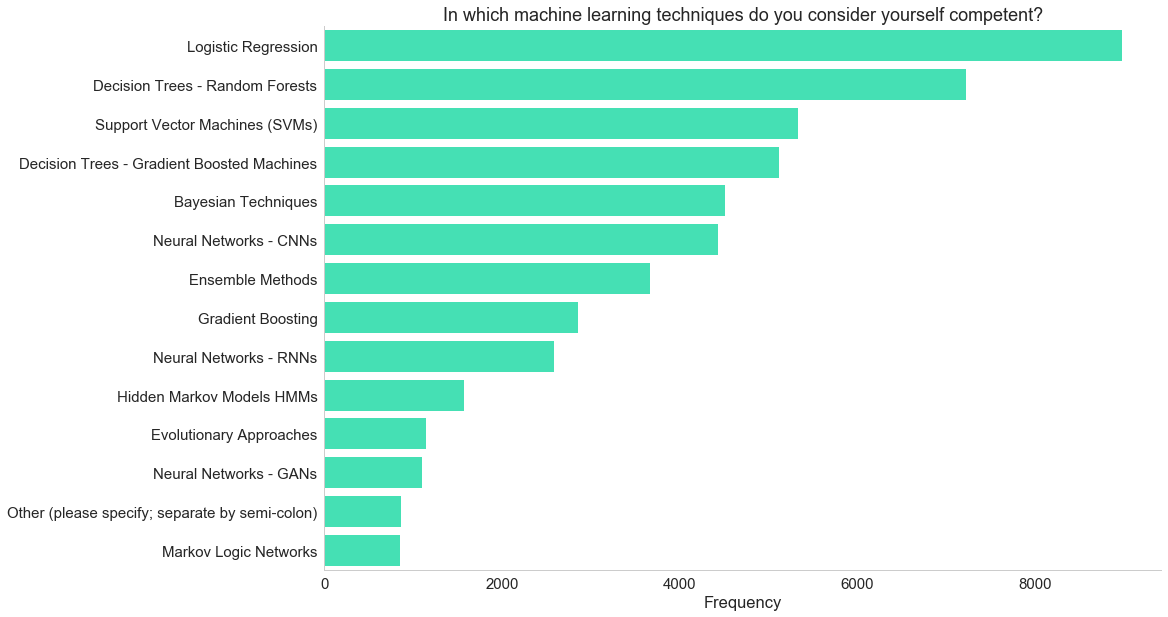

In [74]:
method_coll = Counter()
column = 'MLTechniquesSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update(row.split(','))
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('In which machine learning techniques do you consider yourself competent?')
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/which machine learning techniques do you consider yourself competent.jpg',bbox_inches='tight')

### Comments:
The most common techniques are very standard packages. More advanced methods like Neural nets are not as common.

### What libraries do people use

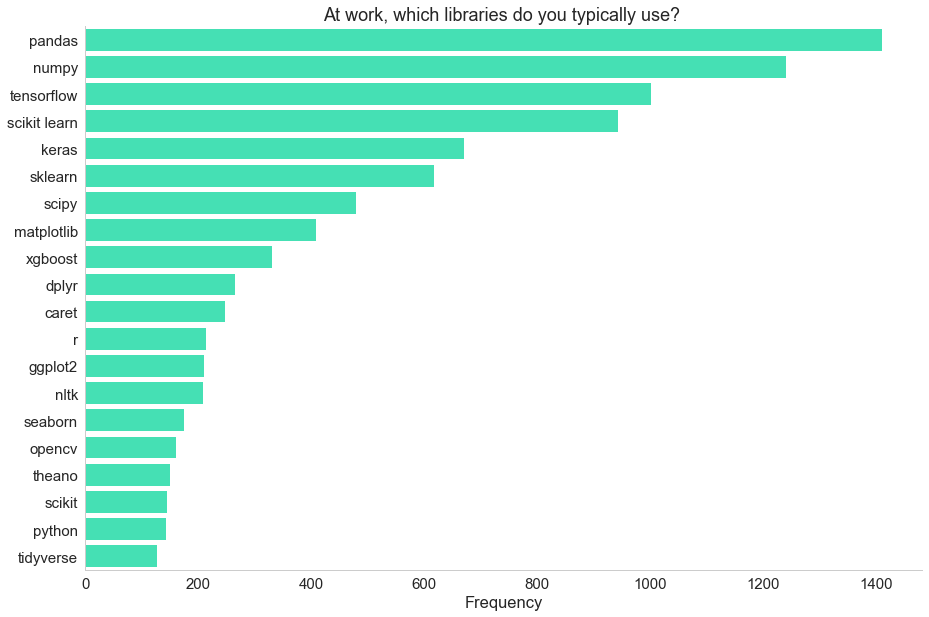

In [75]:
method_coll = Counter()
column = 'WorkLibrariesFreeForm'

for row in df_free[column].tolist():
    blank_list = []
    if type(row) != float:
        #print(row)
        if ',' in row:
            method_coll.update([x.strip().replace('-',' ')  for x in row.lower().split(',') if x != '' and x != ' '])
        elif ';' in row:
            method_coll.update([x.strip().replace('-',' ')  for x in row.lower().split(';') if x != '' and x != ' '])
        else:
            method_coll.update([x.strip().replace('-',' ')  for x in row.lower().split('/n') if x != '' and x != ' '])

df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False).iloc[:20,:],color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('At work, which libraries do you typically use? ')
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/which libraries do you typically use.jpg',bbox_inches='tight')

### Comments:
Standard python libraries dominate this set


### What are people actively still learning

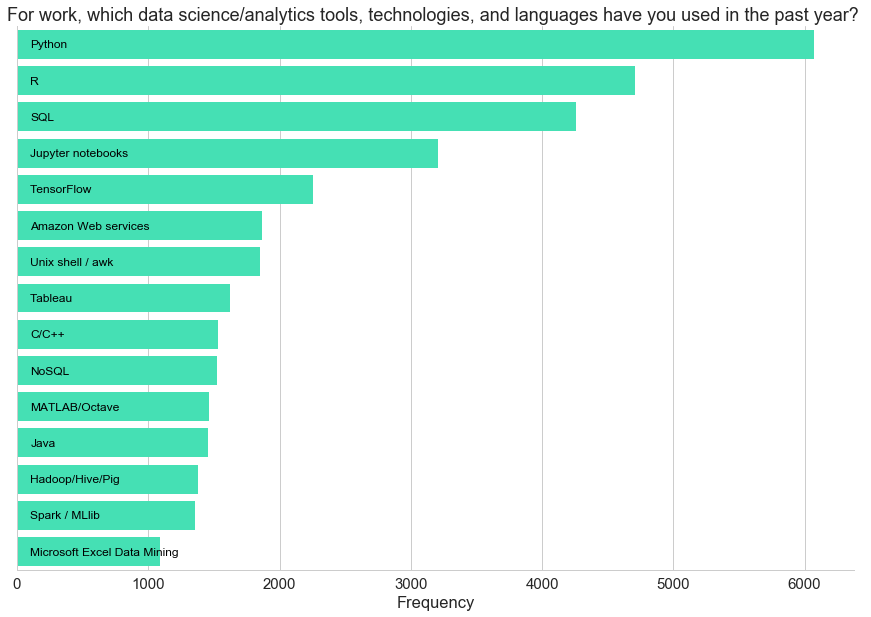

In [44]:
## work algorithms?
method_coll = Counter()
column = 'WorkToolsSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update(row.split(','))

#k_15 = method_coll.most_common(15)


df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False).head(15),color=color, saturation=1)
`
sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title('For work, which data science/analytics tools, technologies, and languages have you used in the past year? ')
ax.set_xlabel('Frequency')
ax.set_ylabel('');

for i,text in enumerate([item.get_text() for item in ax.get_yticklabels()]):
    
    ax.text(100,i+.0,text,fontsize=12,color='black',verticalalignment='center')
    
ax.set_yticklabels([]);

### Comments:
The python and R are the msot common to be needed and what people are learning.

### How are skills proven in the industry

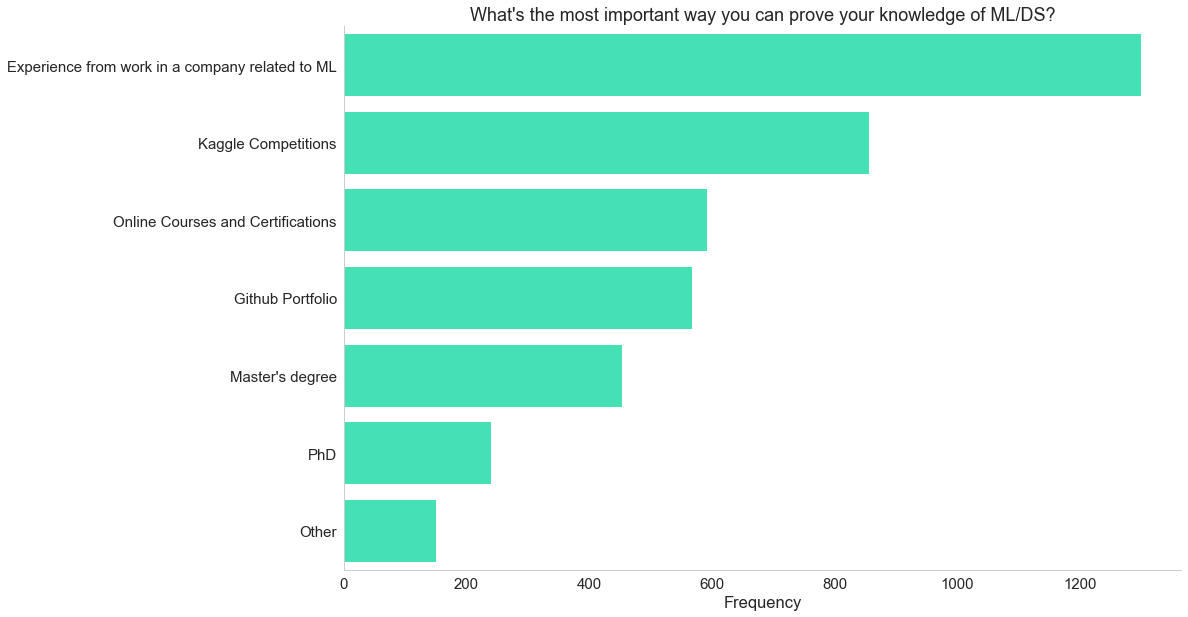

In [76]:
method_coll = Counter()
column = 'ProveKnowledgeSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update(row.split(','))
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title("What's the most important way you can prove your knowledge of ML/DS?")
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/the most important way you can prove your knowledge of ML.jpg',bbox_inches='tight')

### Comments:
Experience is what professionsals are looking for. 

### Exposure to ML

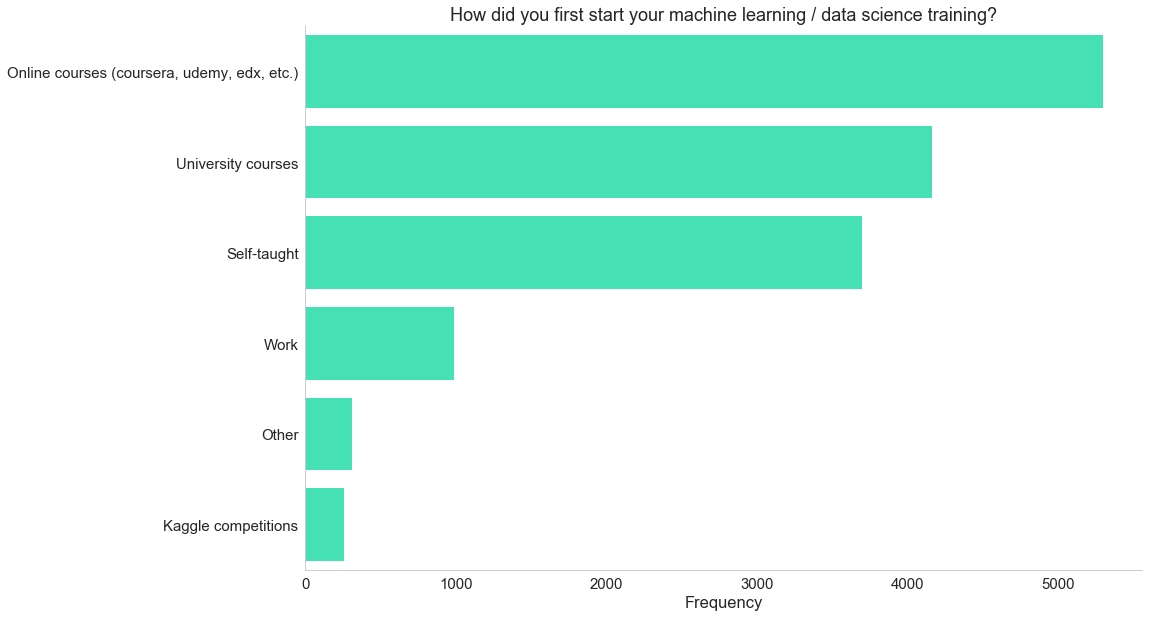

In [105]:
method_coll = Counter()
column = 'FirstTrainingSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update([row])
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title("How did you first start your machine learning / data science training?")
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/How did you first start your machine learning.jpg',bbox_inches='tight')

### Comments:
Online courses now are the place to start for most however universities have not been replaced.

### What are the roles of employees like?

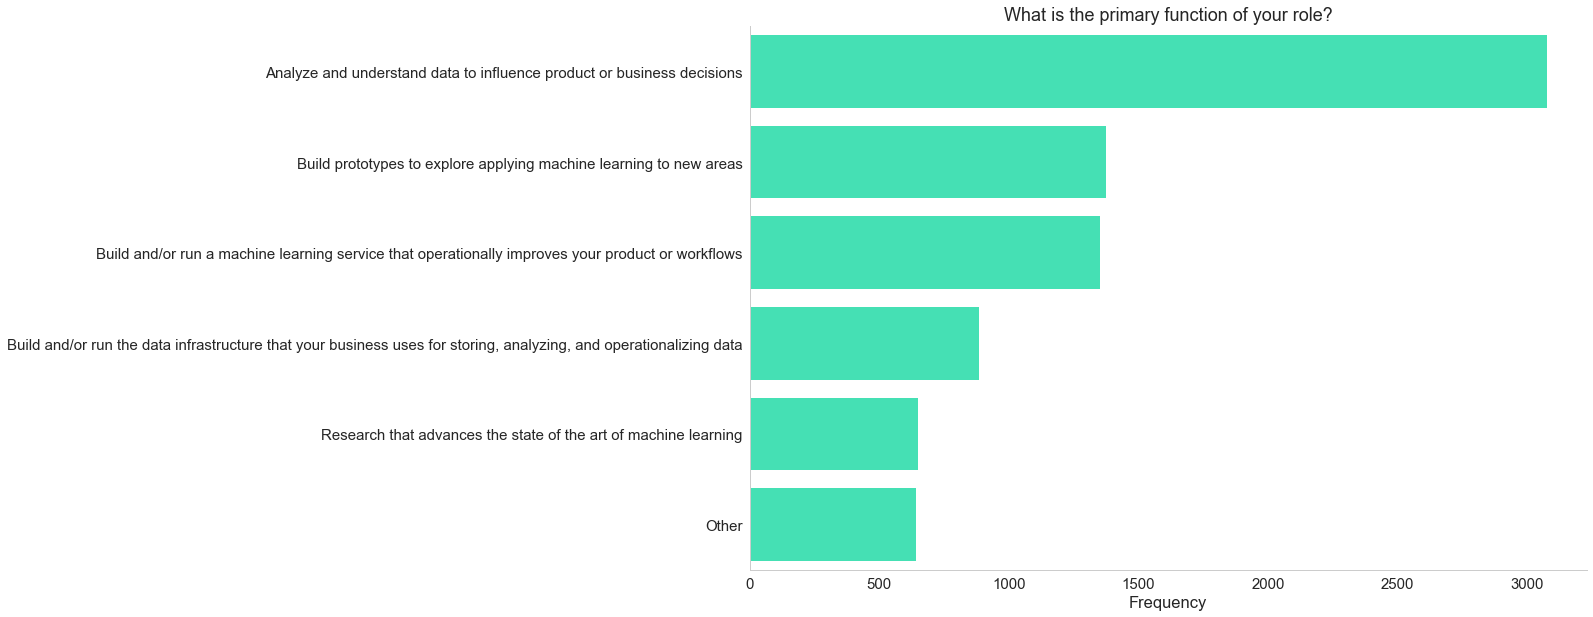

In [104]:
method_coll = Counter()
column = 'JobFunctionSelect'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        method_coll.update([row])
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title("What is the primary function of your role?")
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
plt.savefig('./figures/What is the primary function of your role.jpg',bbox_inches='tight')

#### Comments:
By far, the largest primary function is on data interpretation.

### How big are data sets being use dfor model training

Object `used` not found.


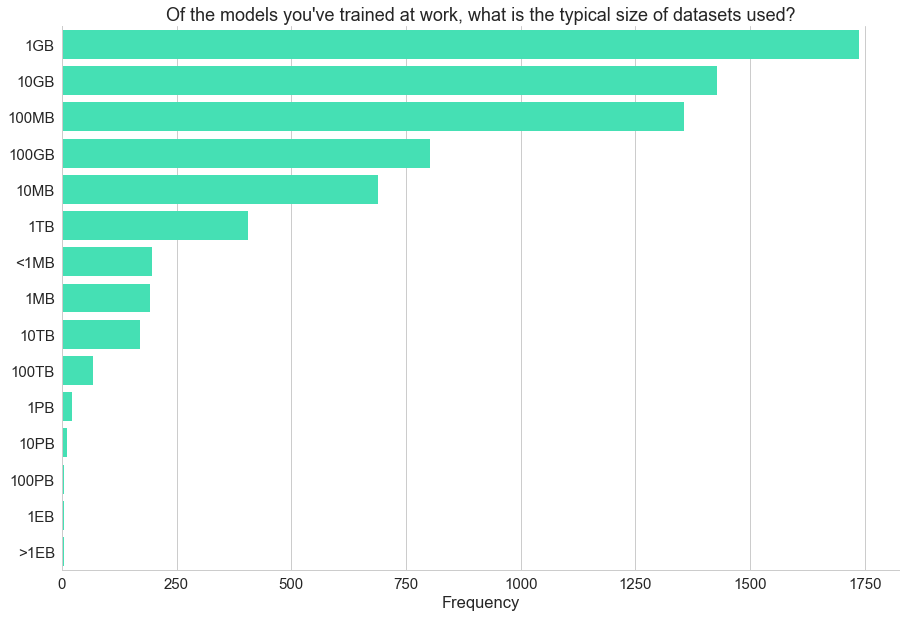

In [48]:
method_coll = Counter()
column = 'WorkDatasetSize'
for row in df_multiguess[column].tolist():
    if type(row) != float:
        #print(row)
        method_coll.update(row.split(','))
        
df = pd.DataFrame.from_dict(method_coll, orient='index').reset_index()

fig,ax = plt.subplots(1,1,figsize=(15,10))
plot = sns.barplot(y="index", x=0, data=df.sort_values(by=0,ascending=False),color=color, saturation=1)

sns.despine(right=True)
for item in plot.get_xticklabels():
    item.set_rotation(0)

ax.set_title("Of the models you've trained at work, what is the typical size of datasets used?")
ax.set_xlabel('Frequency')
ax.set_ylabel('');
ax.grid(False)
#plt.savefig('./figures/.jpg',bbox_inches='tight')

#### Comments:
The majoirty of data used is pretty small if only 1GB. At that scale things are being worked locally most likely. 

### How is time spent by industry employeese

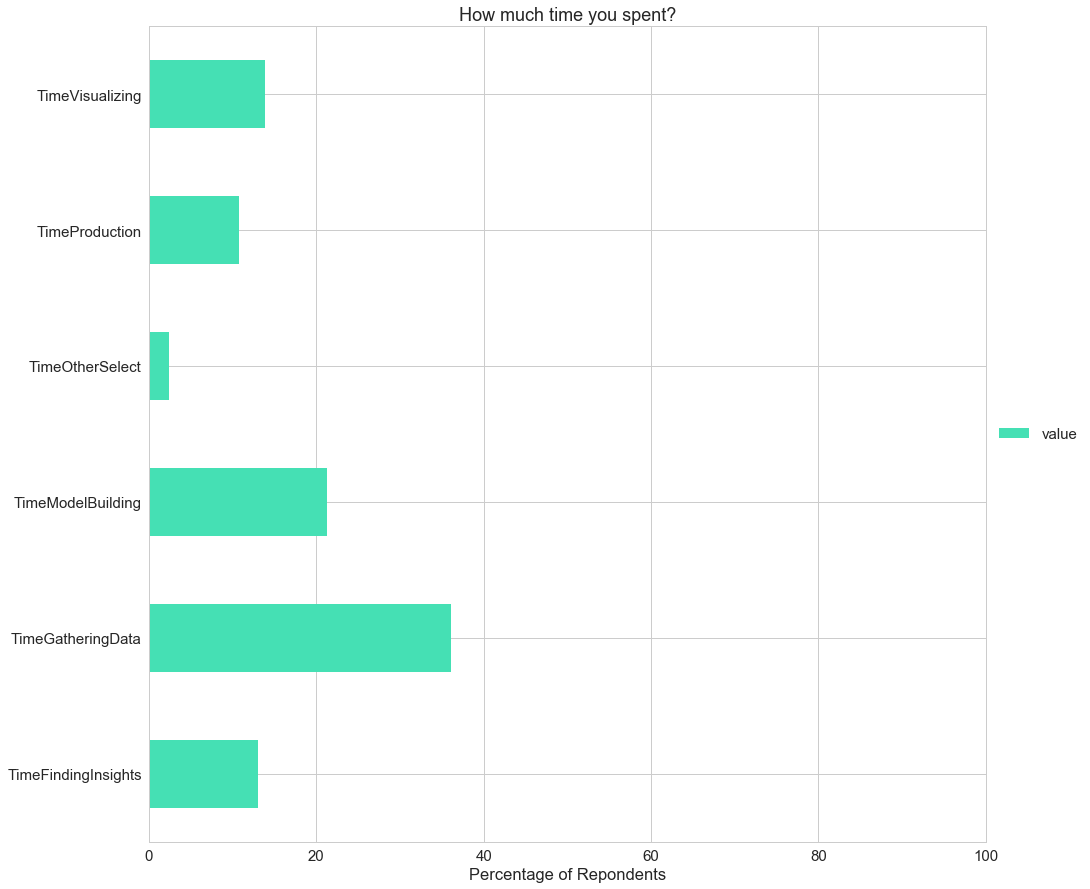

In [49]:
temp = df_multiguess[['TimeGatheringData',
'TimeModelBuilding',
'TimeProduction',
'TimeVisualizing',
'TimeFindingInsights',
'TimeOtherSelect']].dropna(axis=0,how='all')


fig,ax = plt.subplots(1,1,figsize=(15,15))
#temp = temp.melt()
#temp2 = temp.groupby(['variable','value'])['value'].count().unstack()
#temp2.apply(lambda x: 100 * x / temp2.sum(axis=1)).plot(kind='barh',stacked=True,ax=ax)
temp.melt().groupby('variable').mean().plot(kind='barh',stacked=True,ax=ax,color=color)
ax.set_title('How much time you spent?')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); ax.set_xlim(0,100)
ax.set_xlabel('Percentage of Repondents')
ax.set_ylabel('');
ax.grid(False)


#### Comments:
The majority of time for these indvidiuals is spent gathering data.